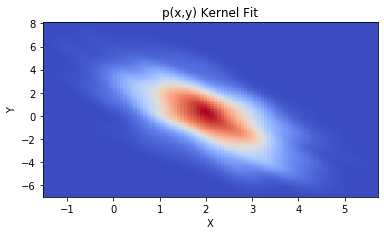

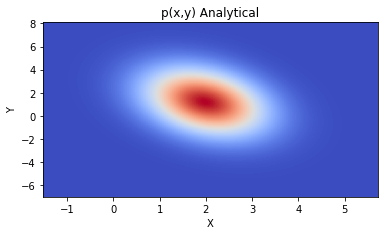

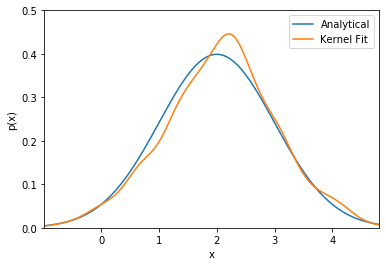

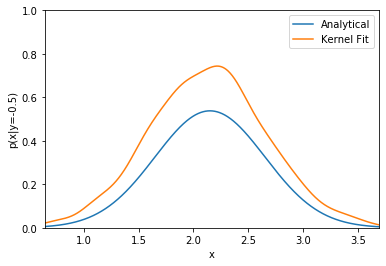

In [72]:
#Problem #4:

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

##Generate 1000 samples of p(x,y), p(x), and p(x|y=-0.5).
pxy_sam=np.random.multivariate_normal([2, 0],[[1, -1.5],[-1.5, 5]],1000) #p(x,y) samples
px_sam=np.random.normal(2,1,1000) #p(x) samples
pxgy_sam=np.random.normal(2.15,0.55,1000) #p(x|y=-0.5) samples

##Use SciPy's Gaussian kernel density estimator to fit a probability density
#p(x,y) estimation shown below
px_kde=st.gaussian_kde(px_sam) #p(x) estimator
pxgy_kde=st.gaussian_kde(pxgy_sam) #p(x|y=-0.5) estimator

#Plot it against the densities derived analytically.
#We will need two plots, one that is 2-D for the bivariate Gaussian, and another for the univariate Gaussians, p(x) and p(x|y).
#2-D plot for p(x,y)
xax=pxy_sam[:,0]
yax=pxy_sam[:,1]
deltaX=(max(xax)-min(xax))/10
deltaY=(max(yax)-min(yax))/10
xmin=min(xax)-deltaX
xmax=max(xax)+deltaX
ymin=min(yax)-deltaY
ymax=max(yax)+deltaY
xx,yy=np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions=np.vstack([xx.ravel(),yy.ravel()])
values = np.vstack([xax,yax])
pxy_kde=st.gaussian_kde(values) # p(x,y) kernel estimation
f=np.reshape(pxy_kde(positions).T,xx.shape)

#create two 2-D plots
fig,ax=plt.subplots()
ax=fig.gca()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.imshow(np.rot90(f),cmap='coolwarm',extent=[xmin, xmax, ymin, ymax])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect(0.25)
ax.set_title('p(x,y) Kernel Fit')

#need analytical sol'n
x=np.linspace(min(xax),max(xax),500)
y = np.linspace(min(yax),max(yax),500)
X, Y =np.meshgrid(x,y)
rho=-0.3
pxy=(1/(2*np.pi*np.sqrt(5*(1-rho**2))))*np.exp((-(X-2)**2)+(-Y**2/5)-2*rho*(X-2)*(Y)/(np.sqrt(5)))
fig,ax=plt.subplots()
ax.imshow(pxy,cmap='coolwarm',extent=[xmin, xmax, ymin, ymax])
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect(0.25)
ax.set_title('p(x,y) Analytical')
plt.show()

##1-D plots for p(x) and p(x|y)

#plot the kernel estimation and analytical solution for p(x)
xmin=min(px_sam)
xmax=max(px_sam)
x=np.linspace(xmin,xmax,1000)
px_an=(1/np.sqrt(2*np.pi))*np.exp((-(x-2)**2)/2) #analytical soln for p(x)
pxfit = px_kde.evaluate(x)
fig,ax=plt.subplots()
ax.plot(x,px_an,label='Analytical')
ax.plot(x,pxfit,label='Kernel Fit')
ax.set_xlim([xmin,xmax])
ax.set_ylim([0, 0.5])
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
plt.show()

#plot the kernel estimation and analytical sol'ns for p(x|y=-0.5)
xmin=min(pxgy_sam)
xmax=max(pxgy_sam)
x=np.linspace(xmin,xmax,1000)
pxgy_an=(1/np.sqrt(2*np.pi*0.55))*np.exp((-(x-2.15)**2)/(2*0.5**2)) #analytical soln for p(x|y=-0.5)
pxgyfit = pxgy_kde.evaluate(x)
fig, ax=plt.subplots()
ax.plot(x,pxgy_an,label='Analytical')
ax.plot(x,pxgyfit,label='Kernel Fit')
ax.legend()
ax.set_xlim([xmin,xmax])
ax.set_ylim([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('p(x|y=-0.5)')
plt.show()

Problem 5

Consider a bivariate Gaussian random variable X distributed according to the joint density:

$$p(x_{1},x_{2}) = \mathcal{N}\begin{pmatrix}\begin{bmatrix}
    3\\
    -1\end{bmatrix}, \begin{bmatrix}
    1.2 & 0.4\\
    0.4 & 1.0
    \end{bmatrix}
    \end{pmatrix}$$
Now consider another random variable Y with components given by a non-linear transformation of X, namely:

$$(y_1,y_2)=(\alpha x_1, x_2/\alpha+\beta(x_1^2+\alpha^2))$$

with $\alpha = 1.5$ and $\beta = 0.2$.

Write a Python code to generate 5000 realizations of X, and use them to generate 5000 samples of Y. Plot the samples of Y along with a Gaussian kernel density estimator. Also compute and report the the empirical mean of Y.

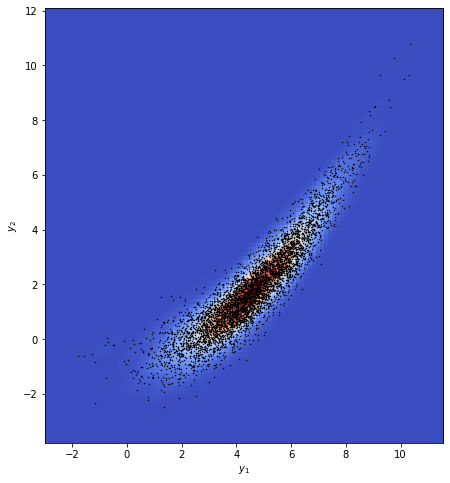

4.5114988270010565 1.8276560492192264


In [74]:
#Problem 5:

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

#Generate 5000 realizations of X
a=1.5
b=0.2
x=np.random.multivariate_normal([3, -1],[[1.2, 0.4],[0.4, 1]],5000) #samples of p(x)
x1=x[:,0]
x2=x[:,1]

#Generate 5000 realizations of Y using the given X information.
y1=a*x1
y2=x2/a+b*(x1**2+a*a)

#Generate the Gaussian Kernel Density Estimator for Y
delta1=(max(y1)-min(y1))/10
delta2=(max(y2)-min(y2))/10
y1min=min(y1)-delta1
y1max=max(y1)+delta1
y2min=min(y2)-delta2
y2max=max(y2)+delta2
Y1,Y2=np.mgrid[y1min:y1max:100j, y2min:y2max:100j]
positions=np.vstack([Y1.ravel(),Y2.ravel()])
values = np.vstack([y1,y2])
kernel=st.gaussian_kde(values) # p(y1,y2) kernel estimation
f=np.reshape(kernel(positions).T,Y1.shape)

#create 2-D plot of Y with samples of Y
fig,ax=plt.subplots(figsize=[8,8])
ax=fig.gca()
ax.set_xlim(y1min,y1max)
ax.set_ylim(y2min,y2max)
ax.imshow(np.rot90(f),cmap='coolwarm',extent=[y1min, y1max, y2min, y2max])
ax.plot(y1,y2,'k.',markersize=1)
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
plt.show()


#Calculate empirical mean of Y.
meany1=np.mean(y1)
meany2=np.mean(y2)
print(meany1,meany2)